In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# creating a random dataset of 2000 samples and 2 features
X, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=32)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=32)

In [8]:
svc_model = SVC(kernel='linear',random_state=32)
svc_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=32)

## what do we need for plotting a decision boundary

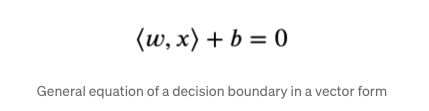

Here, we want to plot a 2-D space. Thus w and x both consist of 2 elements

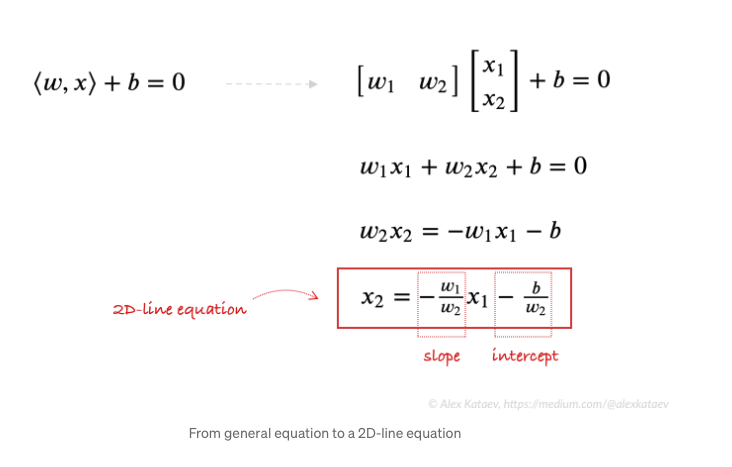

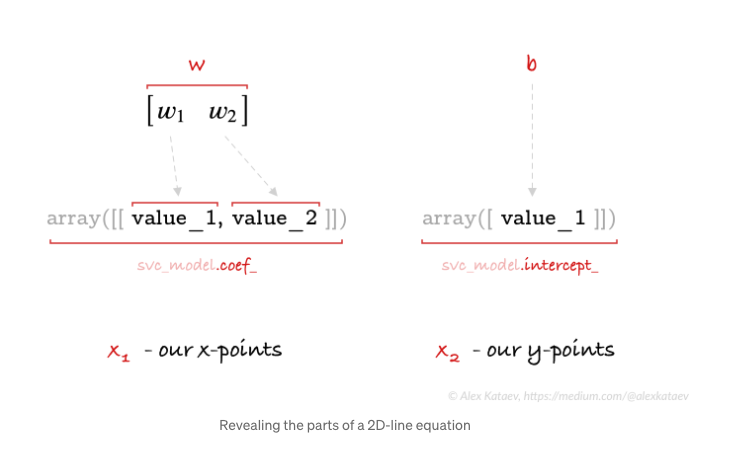

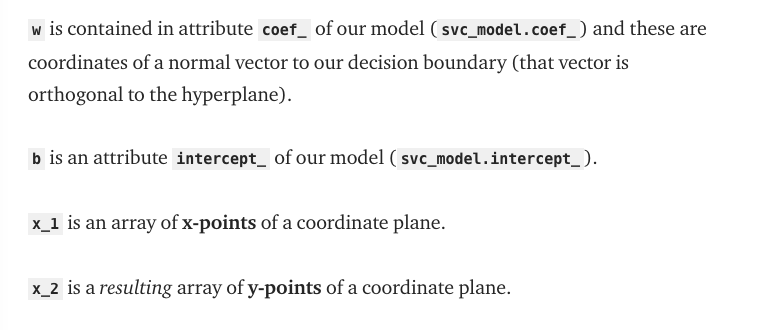

## Bring it all together

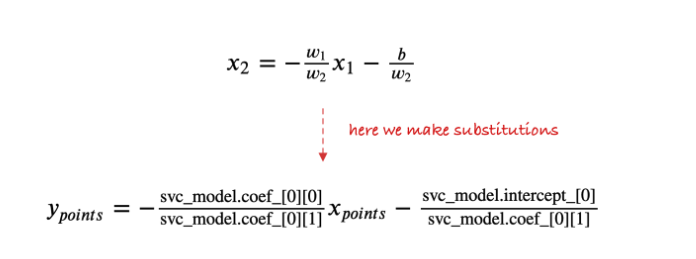

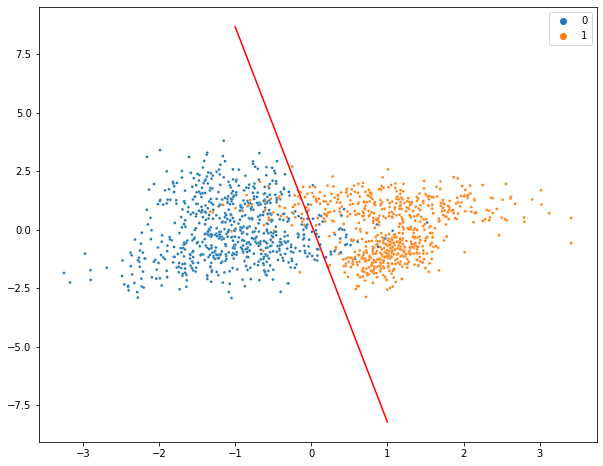

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,8))

sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);

# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

## plotting SVM margins

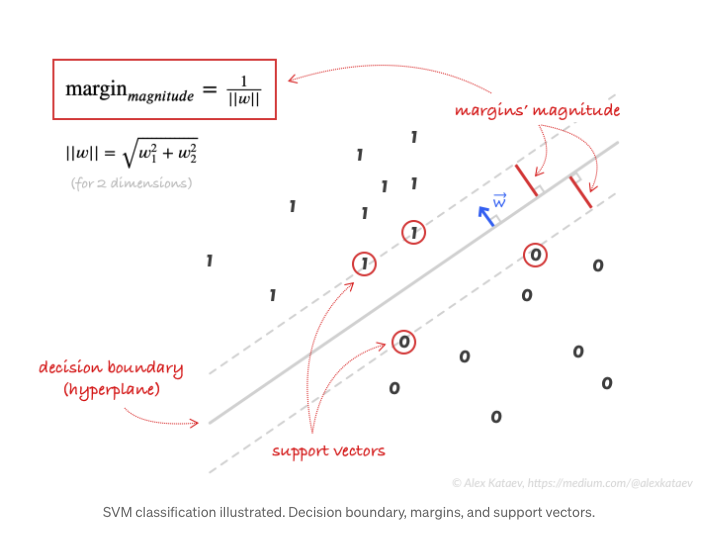

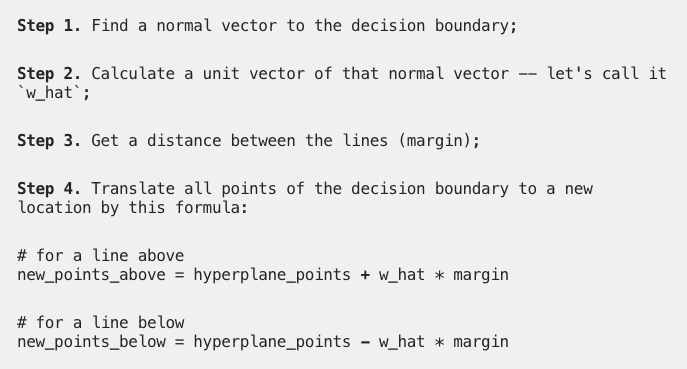

Step 1: 
    
    w is the normal vector we need.
    
    also it is contained in attribute coef_ of the model (model.coef_)

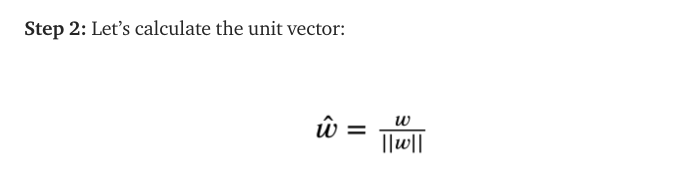

In [13]:
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))

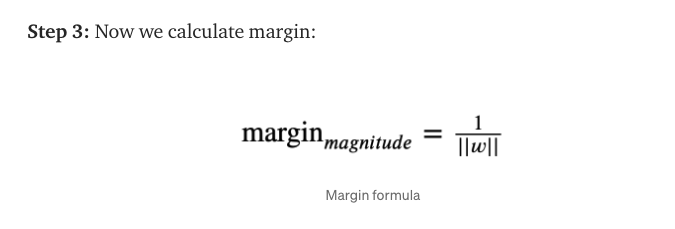

In [14]:
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))

### Step 4:

Calculate points of new lines

In [16]:
decision_boundary_points = np.array(list(zip(x_points, y_points)))

points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

### PLOT

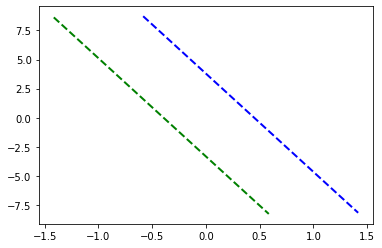

In [17]:
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)

plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

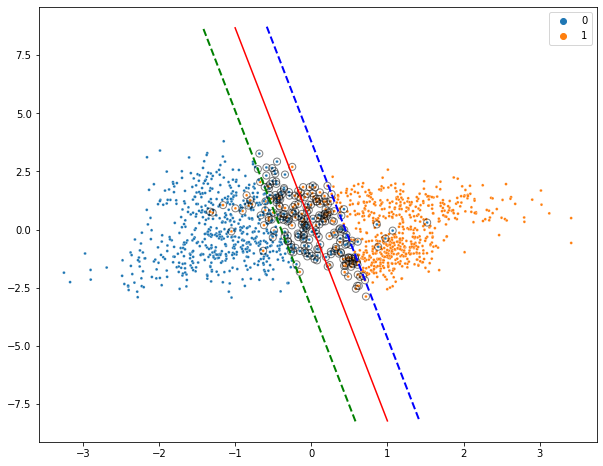

In [22]:
plt.figure(figsize=(10, 8))

# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);

# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element

x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);

# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))

# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))

# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)